<a href="https://colab.research.google.com/github/andre-almd/Analisando-os-Dados-do-Airbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Lisboa*

- Baixe o arquivo no link: [Clique aqui para baixar o arquivo](https://drive.google.com/file/d/1jL6-Qy1aYHEh1OBaHVyNDWvsEstiDM5R/view?usp=drive_link)



O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à região metropolitana de Lisboa e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/DataScience"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv(path + '/airbnb_Lisboa.csv', sep=',')

## Análise dos Dados


**Dicionário das variáveis**

* **id** : identificação única para o anúncio
* **name** : nome do anúncio
* **host_id** : identificador único para o proprietário do imóvel
* **host_name** : nome do proprietário
* **neighbourhood_group** :município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* **neighbourhood** : bairro da propriedade
* **latitude** : coordenada geográfica de latitude da propriedade
* **longitude** : coordenada geográfica de longitude da propriedade
* **room_type** : tipo de quarto oferecido para locação
* **price** : preço da diária do aluguel
* **minimum_nights** : quantidade mínima de noites para alugar o imóvel
* **number_of_reviews** : quantidade de avaliações que o imóvel tem
* **last_review** : data da última avaliação
* **reviews_per_month** : quantidade de avaliações por mês
* **calculated_host_listings_count** : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* **availability_365** : número de dias disponíveis para locação nos próximos 365 dias
* **number_of_reviews_ltm** : quantidade de avaliações nos últimos 12 meses
* **license** : número de registro do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [15]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50633912,Dawn by Tejo apartment,162544509,Rita,Lisboa,Misericrdia,38.68451,-9.14721,Entire home/apt,140,6,9,2022-05-12,0.94,2,48,9,117958/AL
1,26228173,"Double or single room in Cacilhas, Almada.",190814174,Expandavenue,Lisboa,Misericrdia,38.68663,-9.14882,Private room,25,3,52,2022-05-31,1.08,10,169,9,nº 73403/AL
2,626948758397201007,Private Bedroom | Short Board | AtelierSurf29,401590803,Alain,Lisboa,Estrela,38.67714,-9.15887,Private room,34,3,4,2022-06-08,4.00,4,339,4,125224/AL
3,50739035,"Comfortable, Fully Equipped and Home-office Ready",46289990,Daniel,Lisboa,Estrela,38.67610,-9.16045,Entire home/apt,65,2,15,2022-04-30,1.60,1,54,15,118900/AL
4,27597765,Cacilhas AMAZING view of Lisbon+ beaches Caparica,8595303,Gina,Lisboa,Estrela,38.68435,-9.15006,Entire home/apt,82,3,4,2018-10-01,0.09,3,306,0,80019/AL


In [16]:
# Descrição estatística dos dados
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.892900e+04,1.892900e+04,18929.000000,18929.000000,18929.000000,18929.000000,18929.000000,16495.000000,18929.000000,18929.000000,18929.000000
mean,5.972928e+16,1.275861e+08,38.762473,-9.208912,133.735908,4.255692,51.760737,1.335881,14.965661,196.229595,11.739817
std,1.799580e+17,1.340661e+08,0.115862,0.115126,265.123753,19.846961,79.428109,1.436713,37.261586,115.172929,18.484858
min,6.499000e+03,1.445500e+04,38.661270,-9.498520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.614731e+07,1.681903e+07,38.710770,-9.297790,62.000000,1.000000,3.000000,0.340000,1.000000,100.000000,0.000000
50%,2.862440e+07,7.415772e+07,38.717370,-9.147350,94.000000,2.000000,18.000000,0.940000,4.000000,224.000000,5.000000
75%,4.532870e+07,2.047378e+08,38.742960,-9.134910,148.000000,3.000000,66.000000,1.950000,12.000000,296.000000,16.000000
max,6.454518e+17,4.632359e+08,39.333706,-8.794720,9999.000000,1000.000000,1833.000000,65.480000,274.000000,365.000000,989.000000


Com a análise estatística é verificado que alguns dados estão estranhos, como é o caso dos dados de preço e noites mínima para locação.
- Observe que a média do preço é €133. Aqui, 75% dos dados estão abaixo de €148 e o valor máximo é €9999.
- O mesmo ocorre com noites mínimas para locação. Média de 4 noites com valor máximo de 1000, sendo que 75% dos dados está abaixo 3 noites. **Algo não está certo aí.**

Esta discrepância pode ser causada por **outliers**.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [17]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 18929 entradas (registros) e 18 atributos (variáveis).

Os tipos dos atributos são do tipo:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


De início, pode ser observado que o dataset é bem extenso e com muitas informações.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [18]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
reviews_per_month,12.858577
last_review,12.858577
license,7.750013
name,0.042263
number_of_reviews_ltm,0.000000
availability_365,0.000000
calculated_host_listings_count,0.000000
number_of_reviews,0.000000
minimum_nights,0.000000
id,0.000000


Os atributos com dados faltantes são poucos e parecem não serem os mais importantes do dataset. A quantidade de dados faltantes indica não ser tão significante para futuras análises.

### **Q3. Qual o tipo de distribuição das variáveis?**

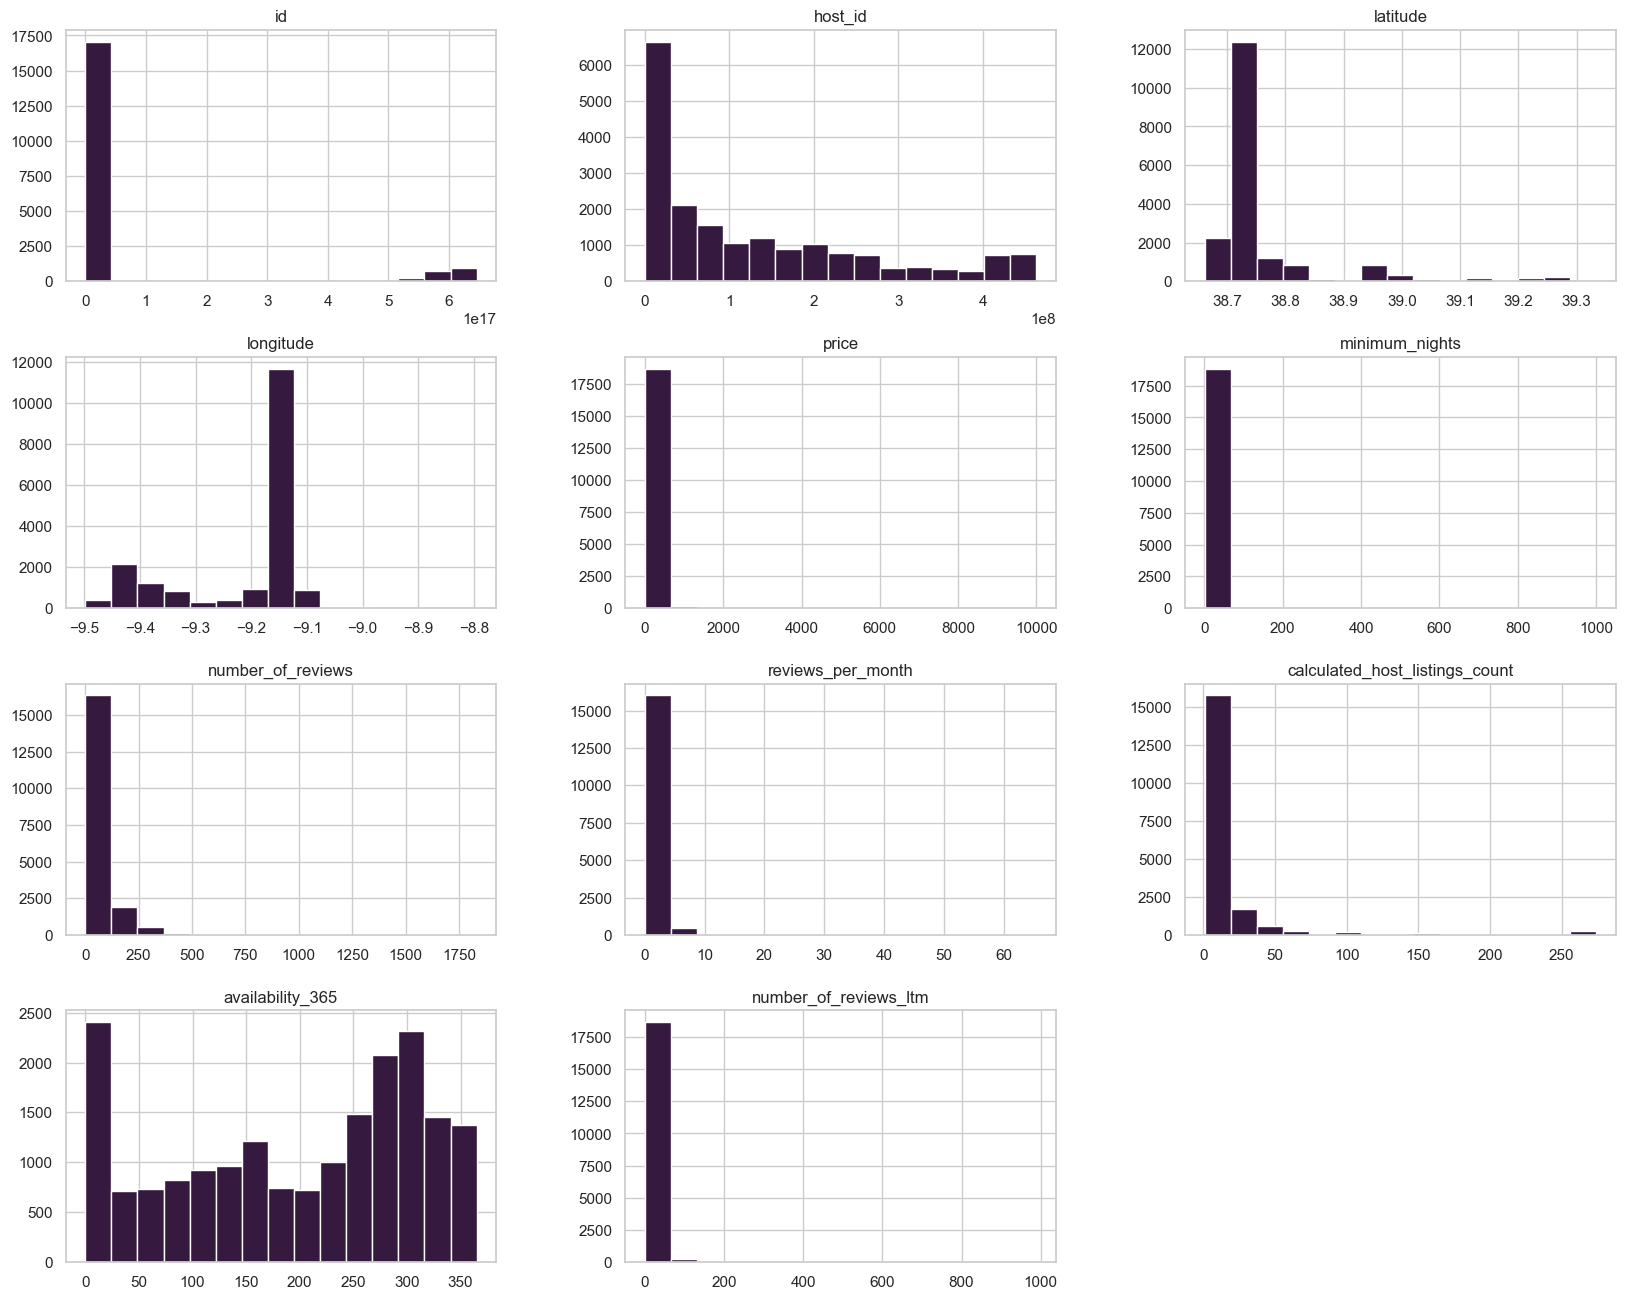

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,16));

Pelos gráficos de histogramas pode ser visto que:

- Há uma distribuição nos atributos de preço e noites mínimas para aluguel que indicam ter valores muito discrepantes nos dados, reforçando a análise estatística inicial;
- A quantidade de reviews também parece variar bastante sem um perfil uniforme para os dados. Sem maiores detalhes não há como ter uma informação mais detalhada aqui;
- A maioria dos imóveis possuem boa disponibilidade de locação para os próximos 365 dias.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print(f'A média dos preços de aluguel na região metropolitana de Lisboa é €{df.price.mean():.2f}')

A média dos preços de aluguel na região metropolitana de Lisboa é €133.74


A média acima considera todos os tipos de quartos.

Se agruparmos por tipo de quarto podemos ver que os quartos privados possuem a menor média de preços e o maior preço de aluguel é para os quartos de hotel.

In [ ]:
preco_medio = df.groupby('room_type').price.mean()
print(f'Média de preços de aluguel em Lisboa por tipo de quarto. Valores em Euros (€)\n{preco_medio}')

Média de preços de aluguel em Lisboa por tipo de quarto. Valores em Euros (€)
room_type
Entire home/apt    147.994616
Hotel room         216.278626
Private room        77.758985
Shared room        106.365000
Name: price, dtype: float64


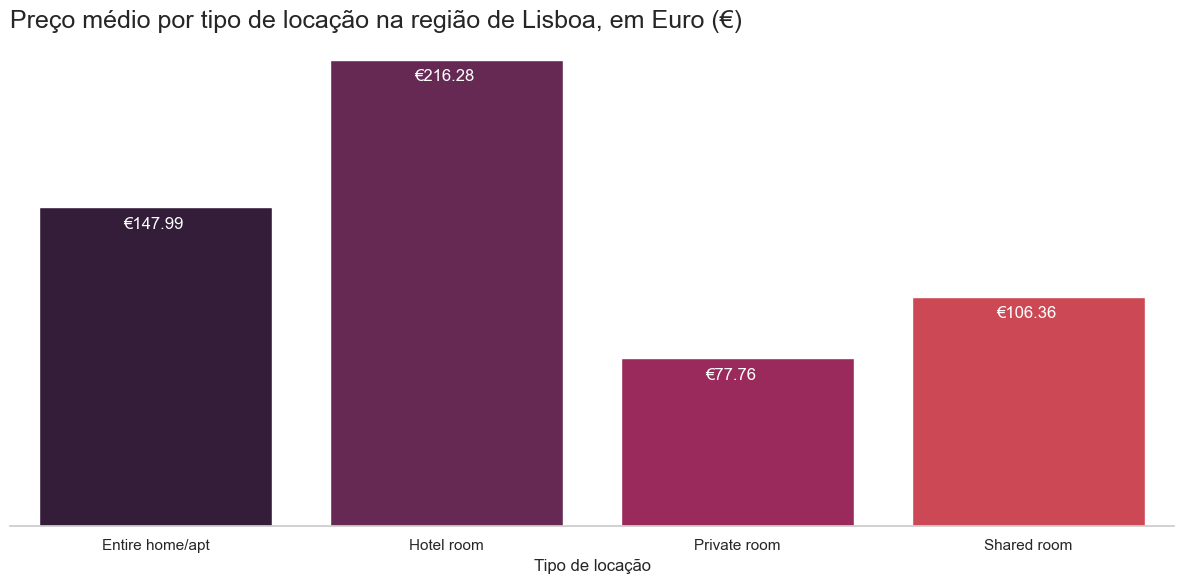

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=preco_medio.index, y=preco_medio.values)
ax.set_title('Preço médio por tipo de locação na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('Tipo de locação')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(preco_medio.values.shape[0]):
  ax.text(i-.11, preco_medio.values[i]-10, f'€{round(preco_medio.values[i], 2)}', fontsize=12, color='white')

plt.tight_layout()

Como esperado, os quartos de hoteis são mais caros, seguidos pelos apartamentos ou casas completos.

No entanto, é interessante observar que os quartos compartilhados são mais caros, em média, do que os quartos privados.

**Será que é mais barato ir em Lisboa e ficar em quarto privado do que num quarto compartilhado em um hostel???**

### **Q5. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df.corr()
# mostrar a matriz de correlação
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.333491,0.004589,-0.011075,0.006153,0.014476,-0.206379,0.196063,0.012157,0.117312,-0.168159
host_id,0.333491,1.000000,0.052207,0.008337,0.027587,0.010783,-0.280993,0.068639,-0.090468,0.087254,-0.069052
latitude,0.004589,0.052207,1.000000,-0.372207,0.002588,0.006289,-0.175408,-0.199993,-0.075431,0.071594,-0.152859
longitude,-0.011075,0.008337,-0.372207,1.000000,-0.066466,0.003863,0.204065,0.229485,0.089798,0.004286,0.166591
price,0.006153,0.027587,0.002588,-0.066466,1.000000,-0.011700,-0.056440,-0.040684,0.013584,0.048810,-0.041788
minimum_nights,0.014476,0.010783,0.006289,0.003863,-0.011700,1.000000,-0.039950,-0.049786,-0.020809,-0.034273,-0.059074
number_of_reviews,-0.206379,-0.280993,-0.175408,0.204065,-0.056440,-0.039950,1.000000,0.640926,-0.079158,-0.008907,0.637471
reviews_per_month,0.196063,0.068639,-0.199993,0.229485,-0.040684,-0.049786,0.640926,1.000000,-0.033129,0.067823,0.759427
calculated_host_listings_count,0.012157,-0.090468,-0.075431,0.089798,0.013584,-0.020809,-0.079158,-0.033129,1.000000,0.064619,-0.002127
availability_365,0.117312,0.087254,0.071594,0.004286,0.048810,-0.034273,-0.008907,0.067823,0.064619,1.000000,0.073865


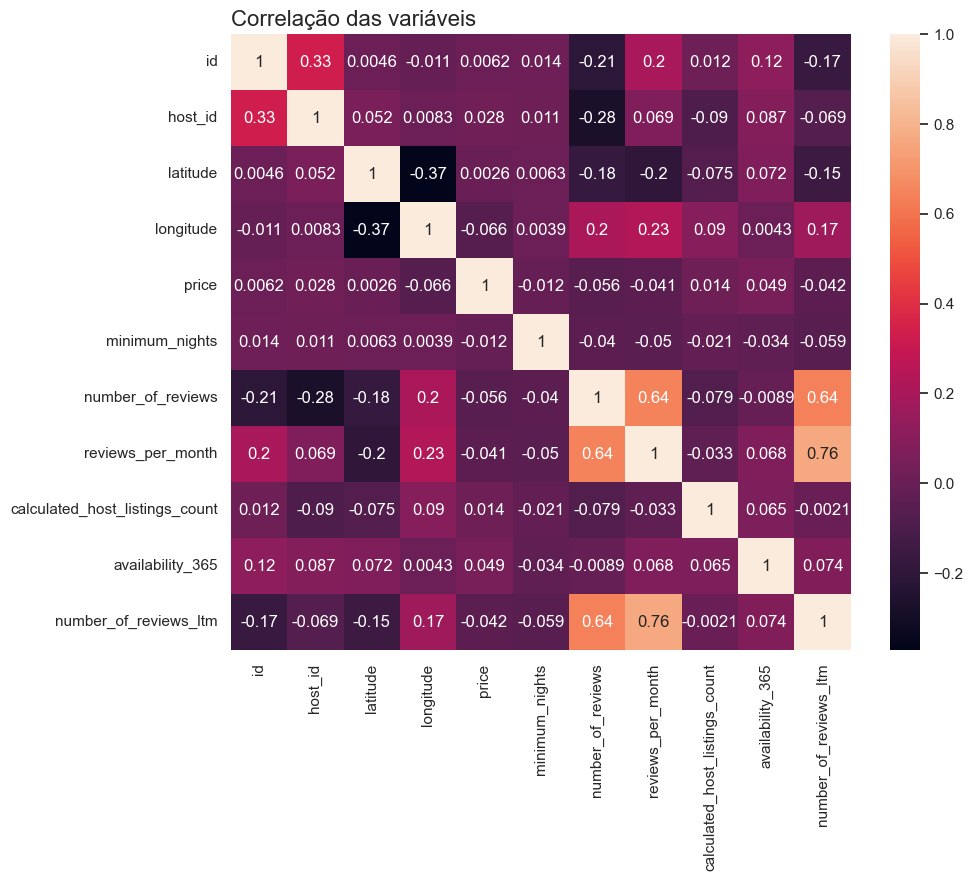

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

Observando a correlação do preço do aluguel com os outros atributos **não é observado correlações fortes**. No entanto, pode ser visto que a maior correlação é com a **longitude**, o que indica que a coordenada geográfica influencia mais no preço do aluguel do que as outras variáveis.

In [ ]:
print(f'Valor absoluto da correlação dos atributos com o preço de aluguel:')
corr.price.abs().sort_values(ascending=False)[1:]

Valor absoluto da correlação dos atributos com o preço de aluguel:


longitude                         0.066466
number_of_reviews                 0.056440
availability_365                  0.048810
number_of_reviews_ltm             0.041788
reviews_per_month                 0.040684
host_id                           0.027587
calculated_host_listings_count    0.013584
minimum_nights                    0.011700
id                                0.006153
latitude                          0.002588
Name: price, dtype: float64

### **Q6. Qual o tipo de imóvel mais disponível no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(f'Imóveis disponíveis por categoria:')
df.room_type.value_counts()

Imóveis disponíveis por categoria:


Entire home/apt    14488
Private room        3979
Hotel room           262
Shared room          200
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(f'Em porcentagem (%), esses dados representam:')
df.room_type.value_counts()/df.shape[0]*100

Em porcentagem (%), esses dados representam:


Entire home/apt    76.538644
Private room       21.020656
Hotel room          1.384120
Shared room         1.056580
Name: room_type, dtype: float64

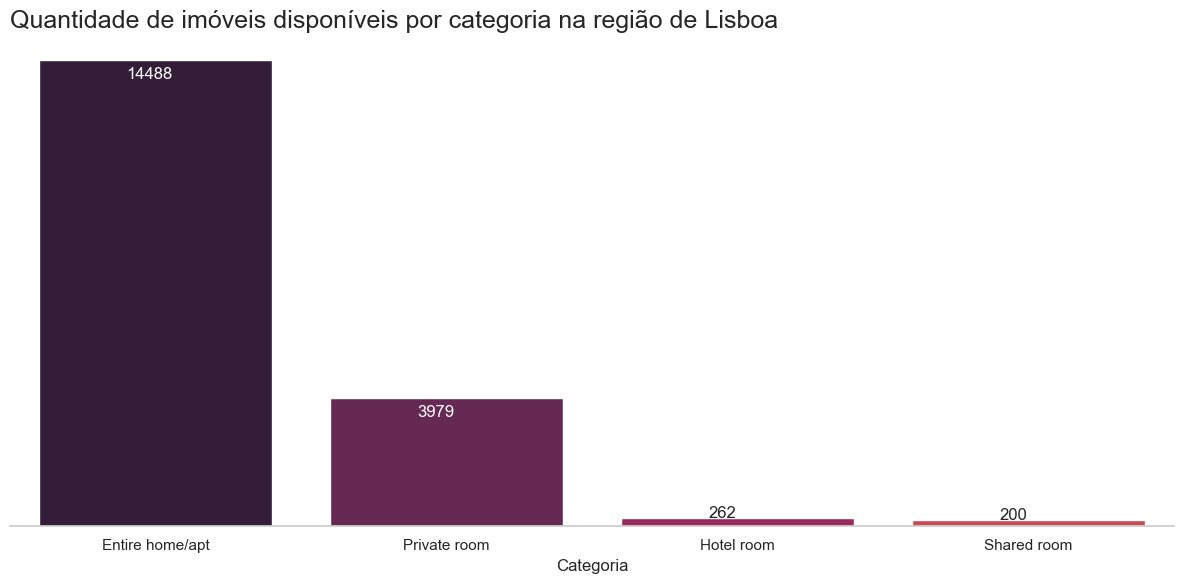

In [ ]:
qt_room = df.room_type.value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=qt_room.index, y=qt_room.values)

ax.set_title('Quantidade de imóveis disponíveis por categoria na região de Lisboa', loc='left', fontsize=18)
ax.set_xlabel('Categoria')
#ax.set_ylabel('Quantidade')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(qt_room.values.shape[0]-2):
  ax.text(i-.1, qt_room.values[i]-600, f'{round(qt_room.values[i], 2)}', fontsize=12, color='white')
for i in range(2, qt_room.values.shape[0]):
  ax.text(i-.1, qt_room.values[i], f'{round(qt_room.values[i], 2)}', fontsize=12)

plt.tight_layout()

**Mais de 76%** dos imóveis disponíveis são casas ou apartamentos completo.

A quantidade de quartos em hoteis ou quartos compartilhados não representa nem 2.5% de todas as opções disponíveis em Lisboa.

### **Q7. Qual a localidade mais cara do dataset?**



In [ ]:
print(f'Existem {df.neighbourhood_group.unique().shape[0]} municíios registrados na região metropolitana de Lisboa no dataset.')

Existem 16 municíios registrados na região metropolitana de Lisboa no dataset.


Na média, a cidade mais cara na região de Lisboa é **Sintra**. E a mais barata é **Amadora**.

In [ ]:
# ver preços por municípios, na média
df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

neighbourhood_group
Sintra                   185.857372
Cascais                  172.175369
Mafra                    138.323207
Azambuja                 135.423077
Sobral De Monte Agrao    129.000000
Lourinh                  128.264151
Torres Vedras            128.126582
Lisboa                   126.256366
Arruda Dos Vinhos        125.125000
Cadaval                  114.833333
Alenquer                 108.671642
Oeiras                   103.827362
Vila Franca De Xira       96.946429
Loures                    80.221477
Odivelas                  61.156250
Amadora                   56.333333
Name: price, dtype: float64

In [ ]:
# Quantidade de dados das cidades mais caras
print(df.query('neighbourhood_group == "Sintra"').shape[0])
print(df.query('neighbourhood_group == "Cascais"').shape[0])

1248
1762


In [ ]:
# Quantidade de dados das cidades mais baratas
print(df.query('neighbourhood_group == "Amadora"').shape[0])
print(df.query('neighbourhood_group == "Odivelas"').shape[0])

117
64


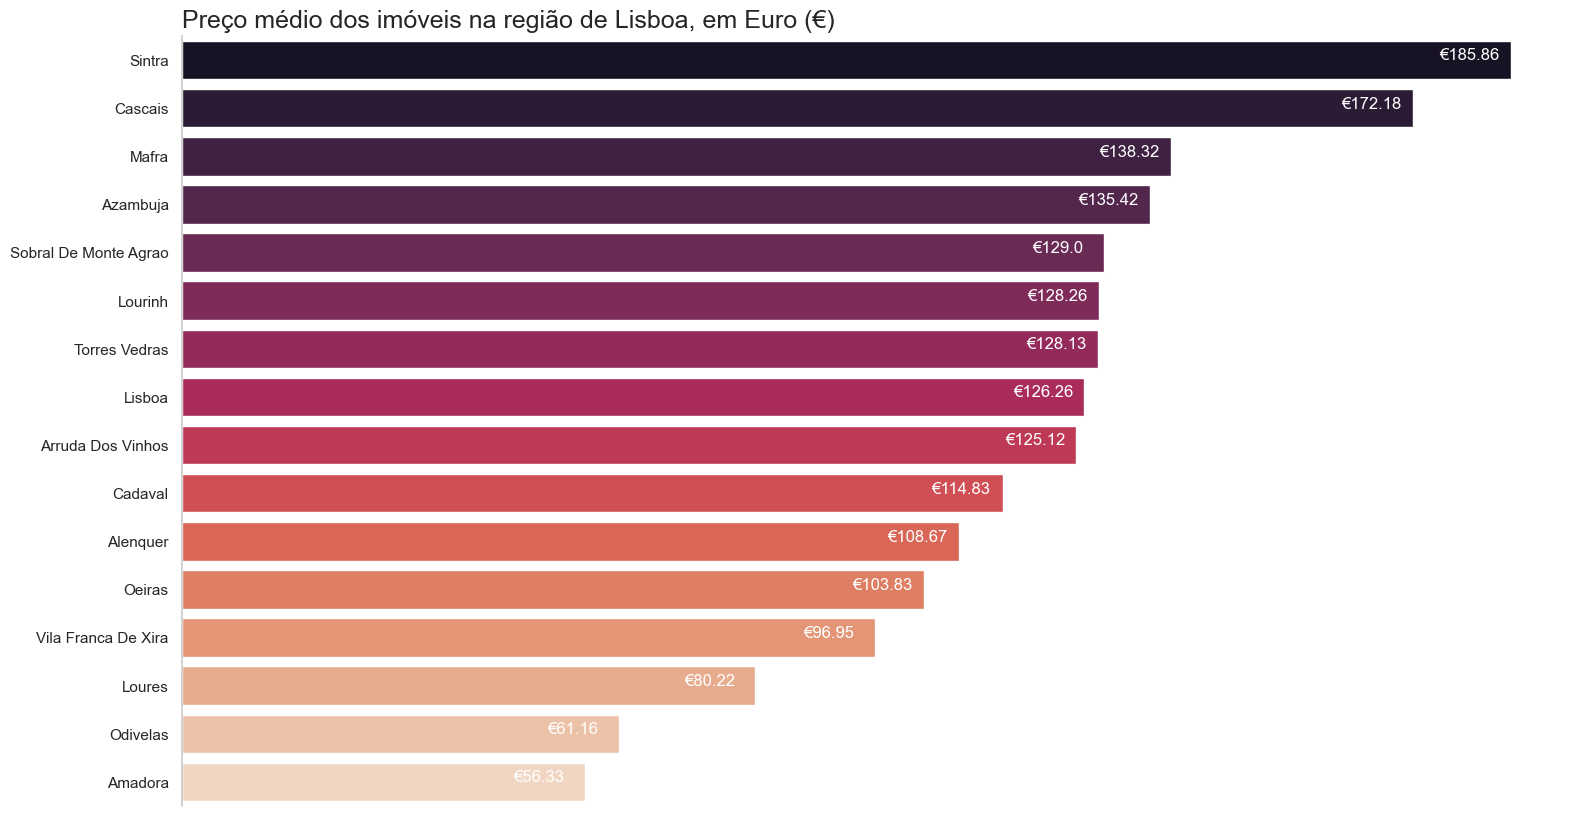

In [ ]:
preco_por_regiao = df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

fi, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=preco_por_regiao.index, x=preco_por_regiao.values, orient='h', palette='rocket')

ax.set_title('Preço médio dos imóveis na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_ylabel('')
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelbottom = False)
ax.grid(False)

#plt.xticks(rotation=45)
for i in range(preco_por_regiao.values.shape[0]):
  ax.text(preco_por_regiao.values[i]-10, i, f'€{round(preco_por_regiao.values[i], 2)}', fontsize=12, color='white')

plt.show()

**Sintra** é a cidade mais cara na região metropolitana de Lisboa para alugar um cômodo pelo Airbnb.

A cidade de **Lisboa**, que é **capital de Portugal** e da região metropolitana, é a maior do país e fica na **8ª posição** das mas caras do Airbnb.

**Será???**

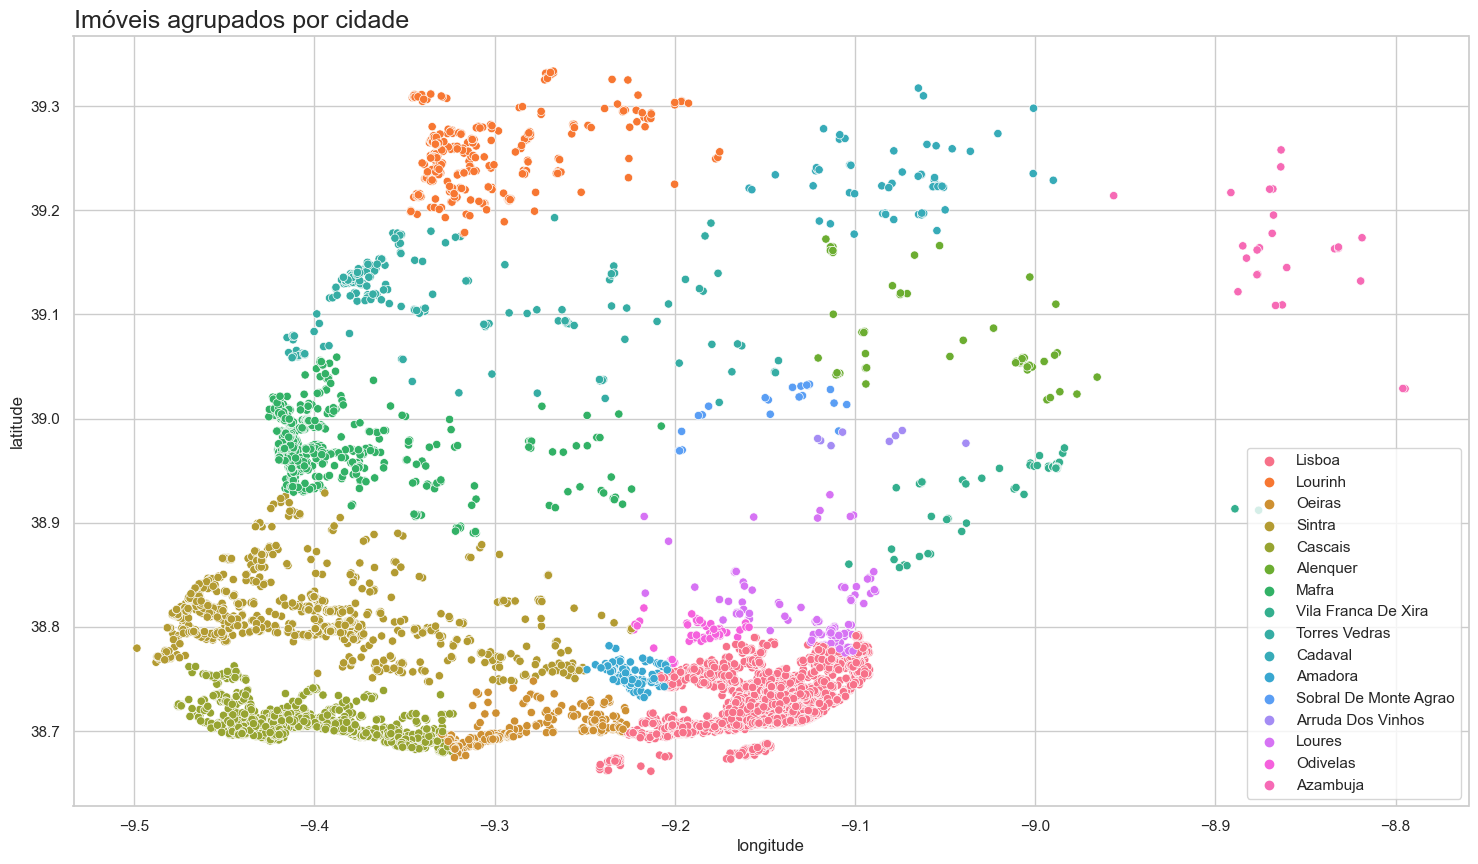

In [ ]:
# plotar os imóveis pela latitude-longitude
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', legend=True)
plt.title('Imóveis agrupados por cidade', loc='left', fontsize=18)
plt.legend(loc='best')
plt.show()

O aluguel mais caro nos dados é de €9999. Vamos ver as informações desse imóvel para análise mais detalhada:

- Diária de €9999 em um hostel com quarto compartilhado na terceira cidade mais cara da região de Lisboa. Não há comentários do imóvel. O Host possui 10 imóveis cadastrados.

In [ ]:
# Aluguel mais caro de €9999
df[df.price == 9999]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15782,51337241,Habitación cuádruple en baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.00376,-9.41837,Shared room,9999,1,0,NaN,NaN,10,160,0,55201/AL


Olhando as informações do host pode ser percebido que os dados são do mesmo hostel e a média de valores é bem baixa. Logo, o valor da diária deve ter sido cadastrado errado. Há também um outro quarto com valor discrepante que também deve ter sido cadastrado errado.

In [ ]:
df[df.host_id == 415595835]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15748,51318536,Doble matrimonial con Balcón y vistas al mar,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003130,-9.416520,Private room,83,1,0,NaN,NaN,10,329,0,55201/AL
15749,51318580,Doble matrimonial baño en suite planta baja,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.001700,-9.418200,Private room,73,1,1,2022-04-16,0.54,10,300,1,55201/AL
15758,51322746,Habitación Triple básica baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.001440,-9.418550,Private room,99,1,0,NaN,NaN,10,160,0,55201/AL
15782,51337241,Habitación cuádruple en baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003760,-9.418370,Shared room,9999,1,0,NaN,NaN,10,160,0,55201/AL
15783,51338083,Cama en habitación triple,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003370,-9.417320,Shared room,29,1,0,NaN,NaN,10,365,0,55201/AL
15784,51338195,Cama en habitación cuádruple baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003590,-9.418090,Shared room,2875,1,0,NaN,NaN,10,160,0,55201/AL
15789,51338239,Cama en habitación triple básica baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.002617,-9.417635,Shared room,29,1,1,2022-05-27,1.00,10,365,1,55201/AL
15791,51338851,Cama en habitación compartida 5 pax,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003110,-9.416750,Shared room,26,1,1,2021-10-17,0.13,10,358,1,55201/AL
15796,51418753,Cama en habitación cuádruple baño compartido,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003580,-9.416560,Shared room,23,1,0,NaN,NaN,10,350,0,55201/AL
15833,51631323,Doble matrimonial baño privado planta alta,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003480,-9.418640,Private room,73,1,5,2022-05-22,0.66,10,312,5,55201/AL


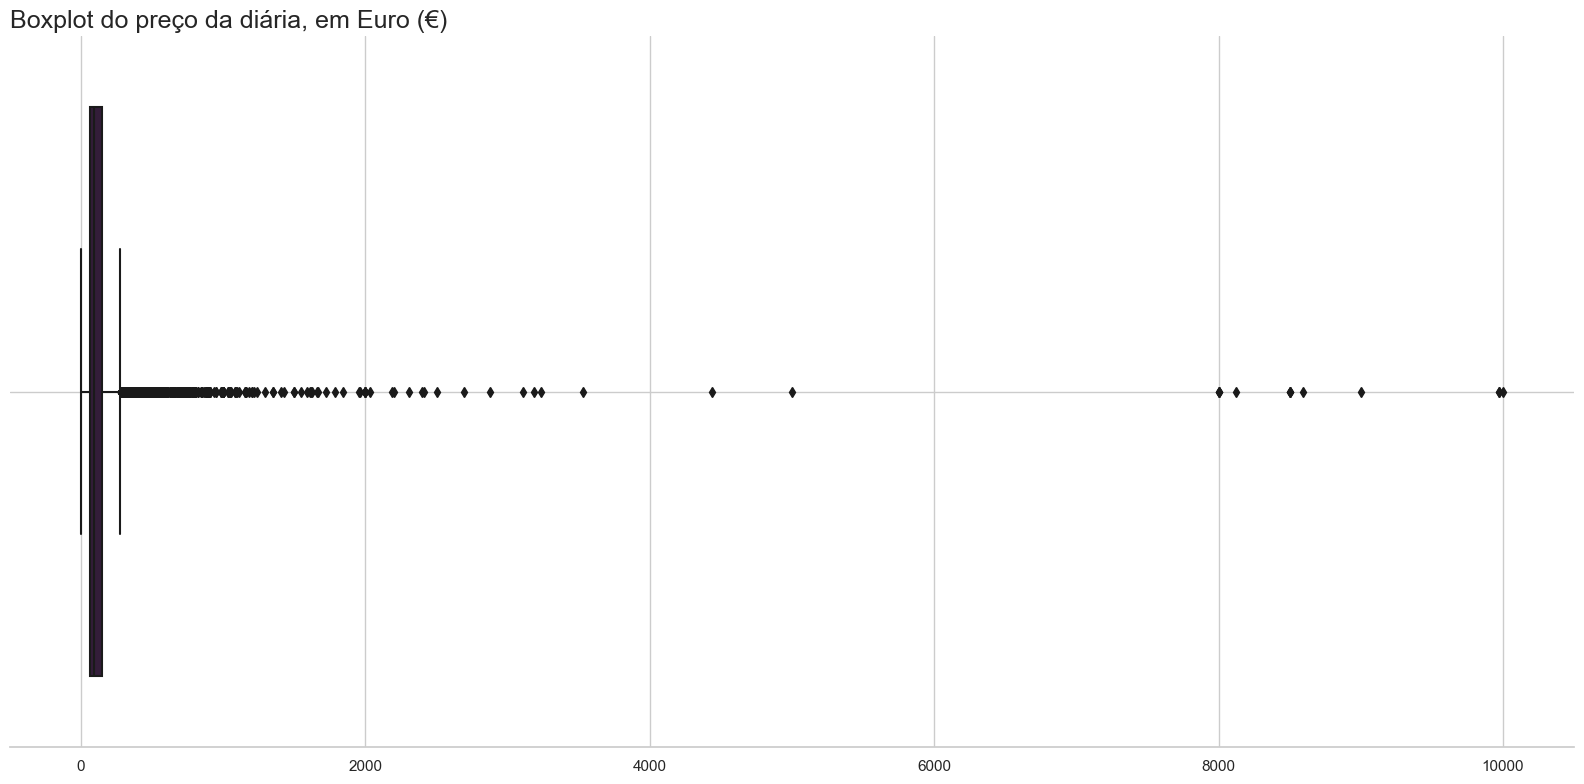

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='price')
ax.set_title('Boxplot do preço da diária, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Com o boxplot acima é visível que há muitos dados discrepantes para o preço médio da diária.

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print(f'A média de noites mínimas para locação é: {df.minimum_nights.mean():.2f}')

A média de noites mínimas para locação é: 4.26


Ou seja, em média, os imóveis possuem um requisito mínimo de **4 noites para locação** do imóvel.

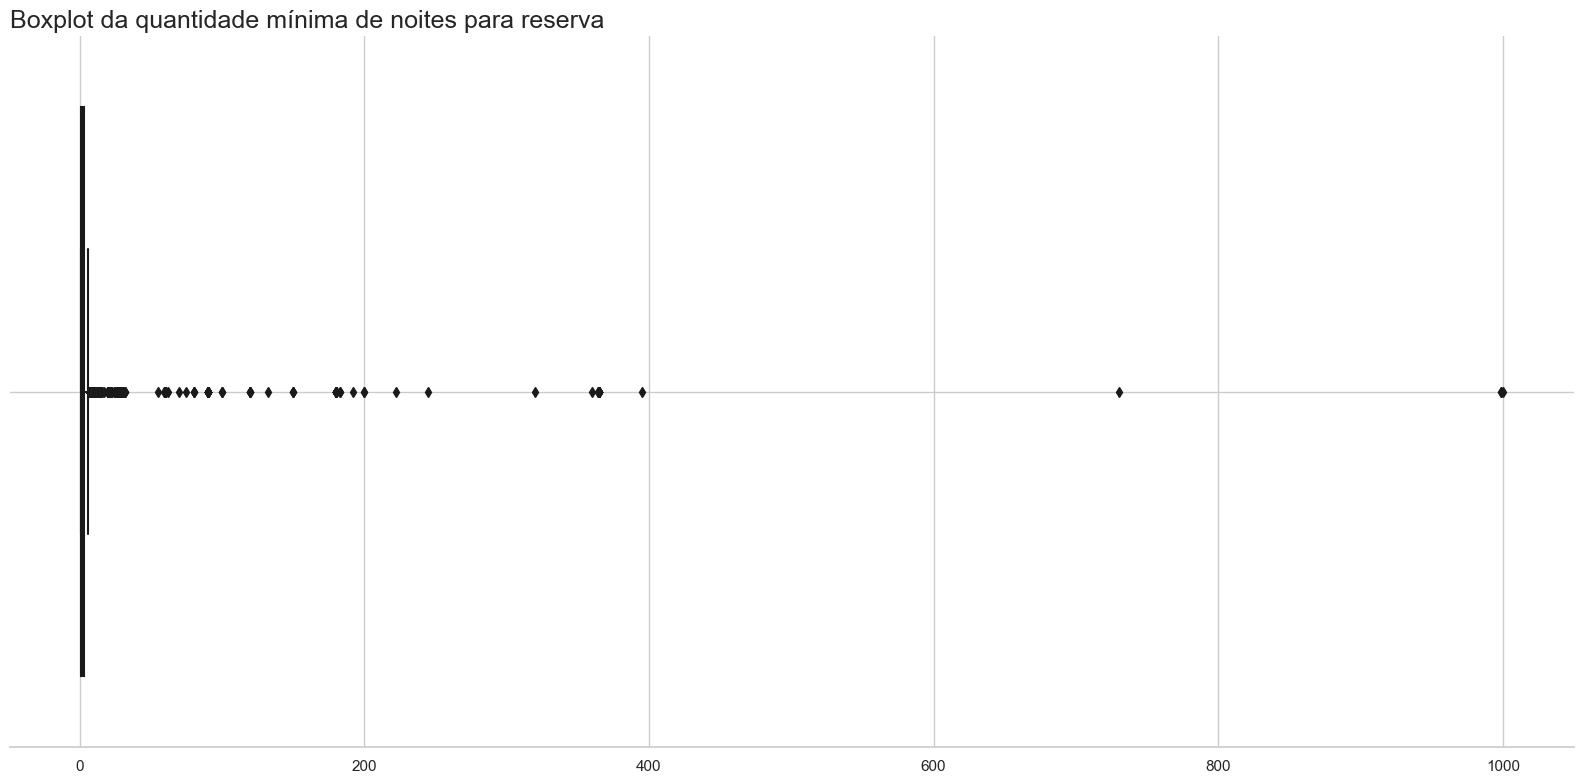

In [ ]:
# Gráfico de boxplot para ver a distribuição
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

É observado uma quantidade muito estranha de noites mínimas em alguns dados. Como um mês tem 30 dias, é estranho pensar que a quantidade mínima para locação de imóveis seja 100, 200 , 300 ou 1000 dias. **Não tem sentido.**

Desconsiderando dos dados os imóveis com noite míminas de locação acima de 30 dias, é possível ver o boxplot abaixo.

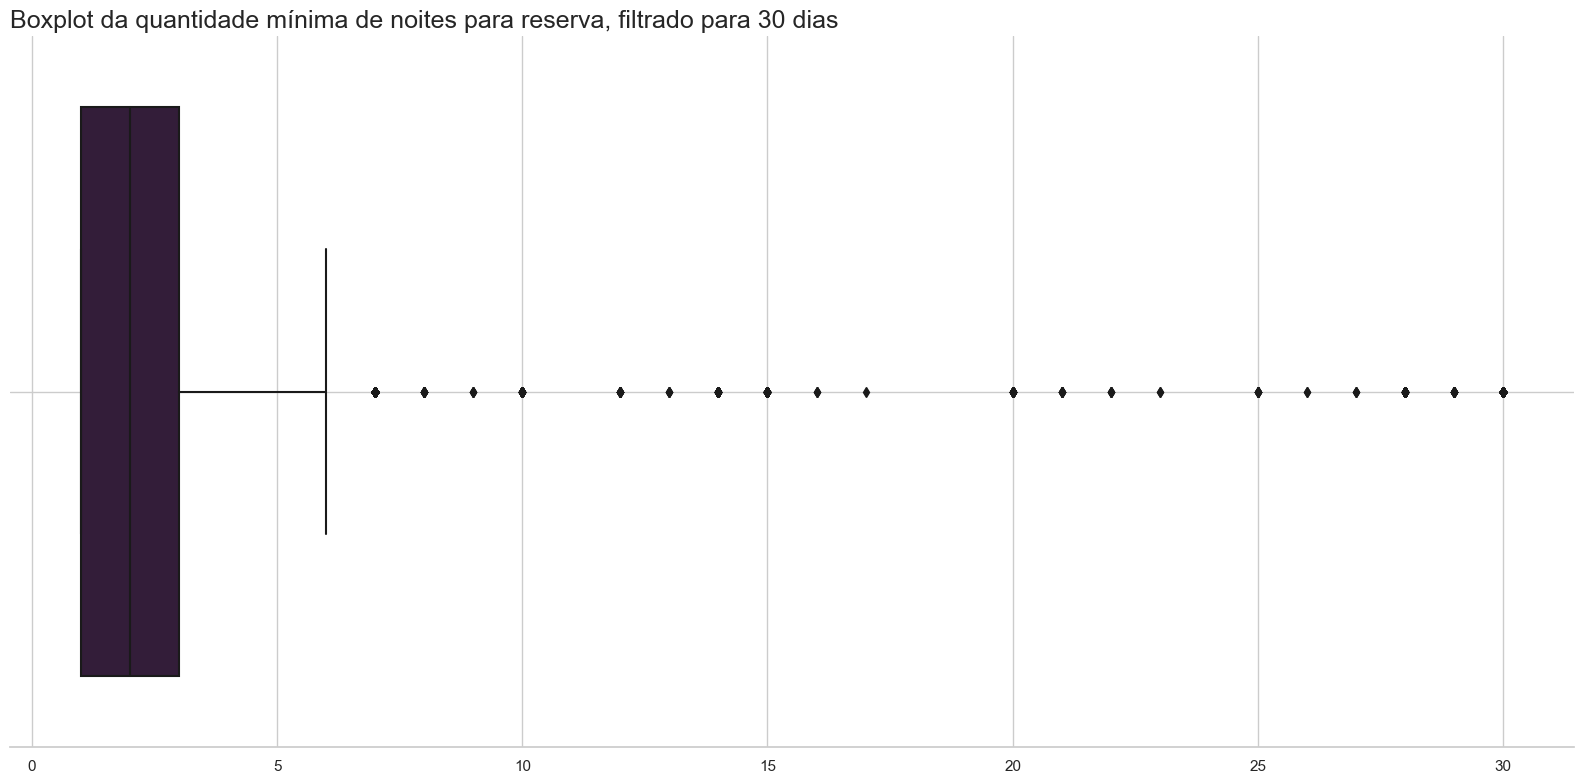

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df[df.minimum_nights <= 30], x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva, filtrado para 30 dias', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Ainda parece existir alguns outliers, mas fica difícil afirmar só pelo gráfico.

Vamos analisar os outliers pela medida do IQR.

## Análise dos outliers

### Dados de preço da diária

In [ ]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3-Q1

# Valores limites para corte
print(Q1 - 1.5*IQR)
print(Q3 + 1.5*IQR)

-67.0
277.0


In [ ]:
# Criando uma cópia do dataset para limpeza
df_clean = df.copy()

# Vou limitar o valor mínimo em 0, já que pelo cáculo foi encontrado um valor negativo.
df_clean.drop(df_clean[df_clean.price <= 0].index, axis=0, inplace=True)
# O valor máximo mantenho o cálculo de Q3 + 1.5*IQR
df_clean.drop(df_clean[df_clean.price > (Q3 + 1.5*IQR)].index, axis=0, inplace=True)

print(f'O dataset original possui {df.shape[0]} amostras')
print(f'O dataset limpo agora possui {df_clean.shape[0]} amostras')

O dataset original possui 18929 amostras
O dataset limpo agora possui 17673 amostras


### Dados de quantidade mínima para locação

In [ ]:
Q1 = df.minimum_nights.quantile(0.25)
Q3 = df.minimum_nights.quantile(0.75)

IQR = Q3-Q1

# Valores limites para corte
print(Q1 - 1.5*IQR)
print(Q3 + 1.5*IQR)

-2.0
6.0


In [ ]:
# Vou limitar o valor mínimo em 0, já que pelo cáculo foi encontrado um valor negativo.
df_clean.drop(df_clean[df_clean.minimum_nights <= 0].index, axis=0, inplace=True)
# O valor máximo mantenho o cálculo de Q3 + 1.5*IQR
df_clean.drop(df_clean[df_clean.minimum_nights > (Q3 + 1.5*IQR)].index, axis=0, inplace=True)

print(f'O dataset limpo agora possui {df_clean.shape[0]} amostras')

O dataset limpo agora possui 16443 amostras


## Como fica o dataset sem outliers???

In [ ]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.644300e+04,1.644300e+04,16443.000000,16443.000000,16443.00000,16443.000000,16443.000000,14748.000000,16443.000000,16443.000000,16443.000000
mean,5.621286e+16,1.257411e+08,38.761157,-9.205491,102.75412,2.340145,56.004865,1.405793,15.369458,197.145716,12.829532
std,1.751142e+17,1.328374e+08,0.114599,0.112779,55.14524,1.158484,82.437665,1.476496,39.015159,114.092456,19.266208
min,6.499000e+03,1.445500e+04,38.661270,-9.498520,10.00000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.595638e+07,1.671987e+07,38.710695,-9.255790,61.00000,1.000000,5.000000,0.390000,1.000000,102.000000,1.000000
50%,2.808094e+07,7.263505e+07,38.716922,-9.146890,90.00000,2.000000,22.000000,1.000000,4.000000,225.000000,6.000000
75%,4.449999e+07,2.006289e+08,38.740490,-9.134490,133.00000,3.000000,73.000000,2.030000,12.000000,296.000000,18.000000
max,6.454518e+17,4.632359e+08,39.333706,-8.794720,277.00000,6.000000,1833.000000,65.480000,274.000000,365.000000,989.000000


Agora os dados estão dentro de uma padrão que parece esar ok.

Vamos ver o histograma novamente.

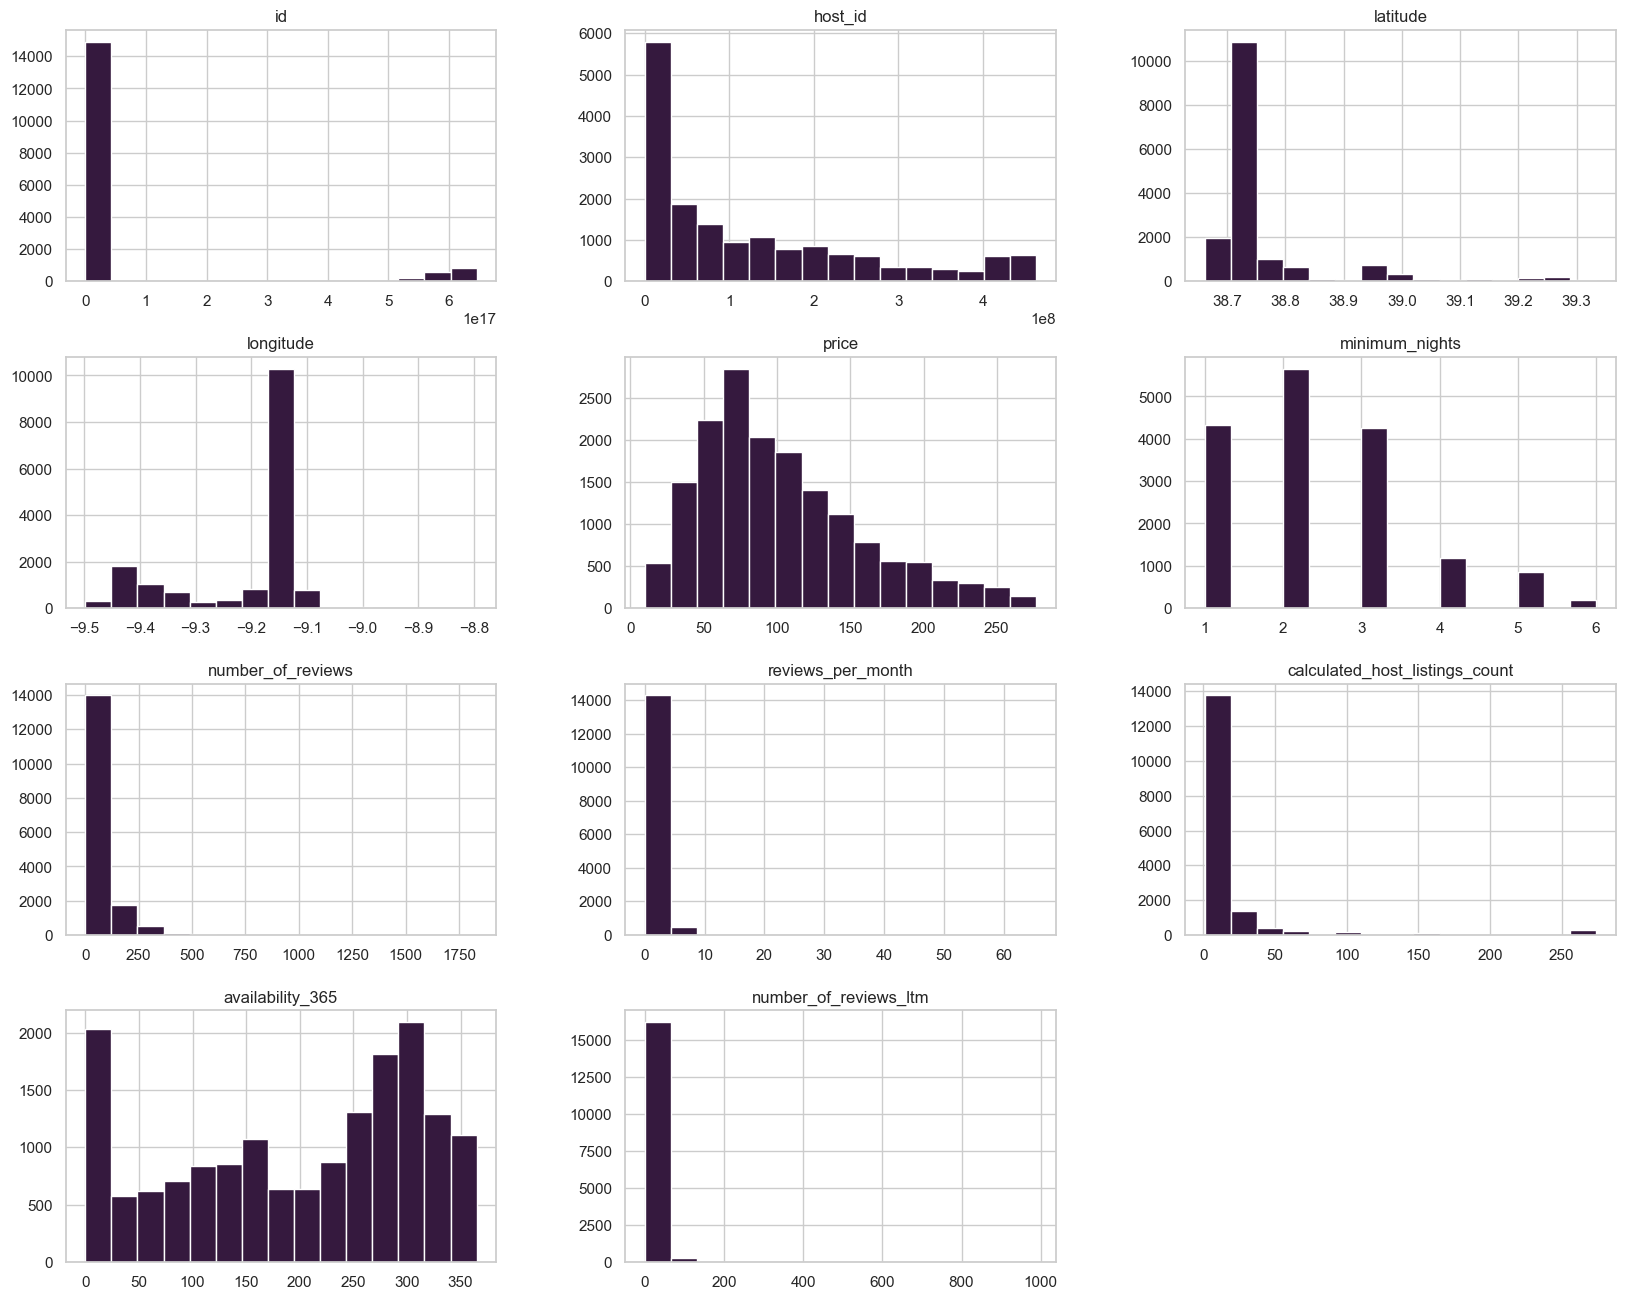

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(20,16));

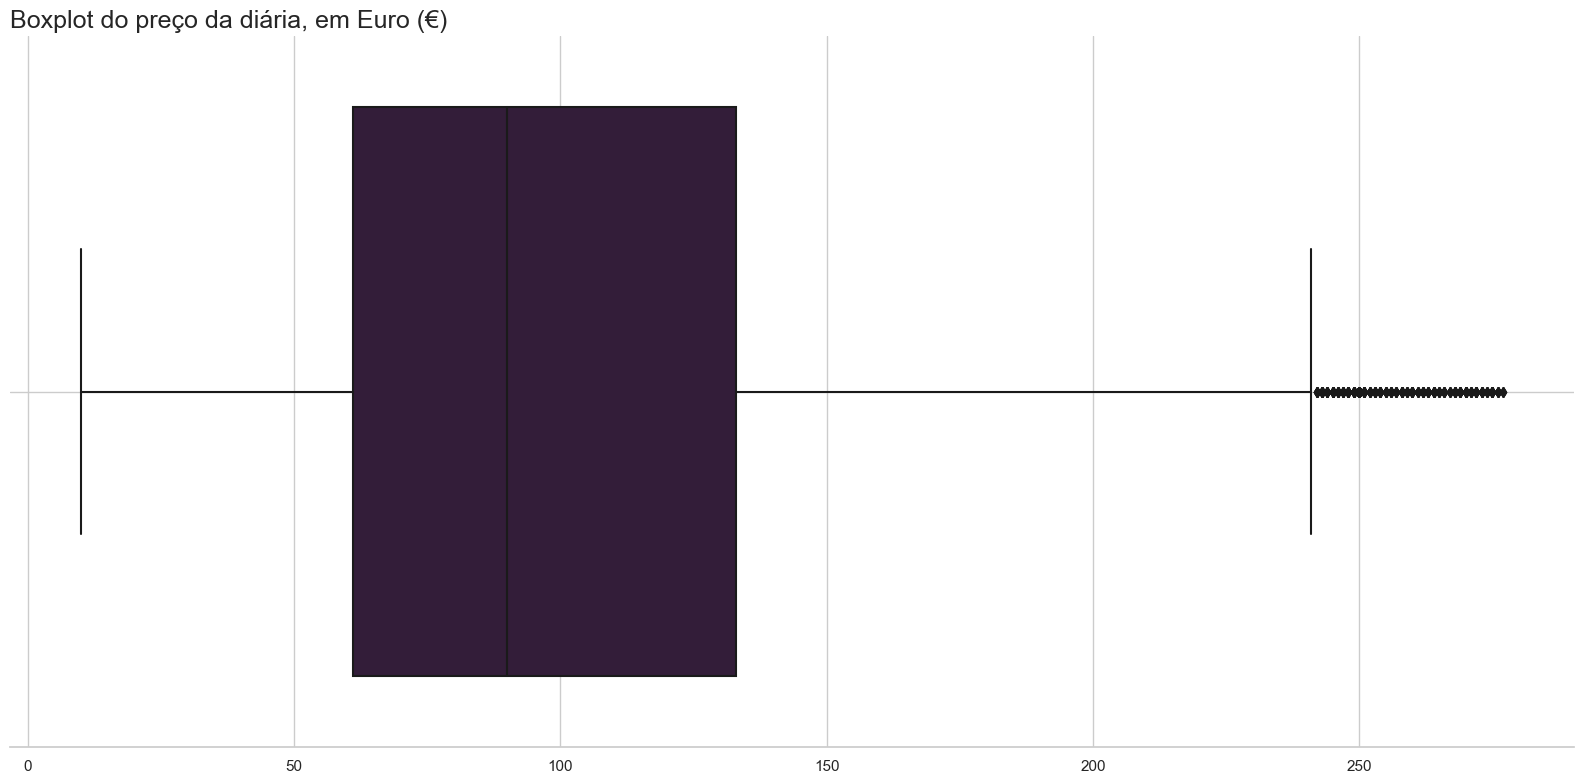

In [ ]:
# Boxplot do preço médio da diãria com o dataset limpo
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df_clean, x='price')
ax.set_title('Boxplot do preço da diária, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

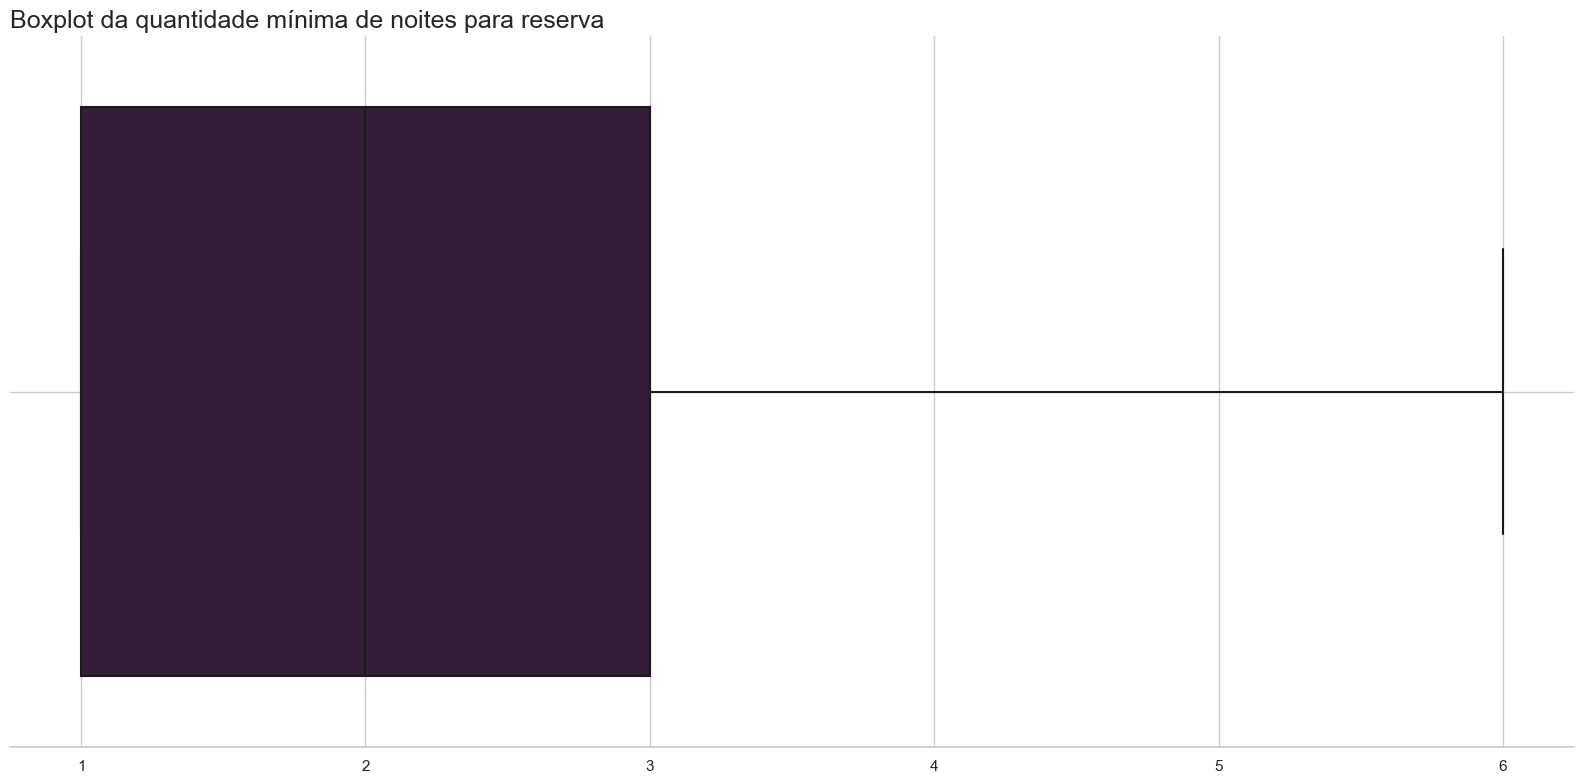

In [ ]:
#Boxplot da quantidade de noites mínima com o dataset limpo
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df_clean, x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Com a análise acima pode ser visto uma **melhora significativa nas variações dos dados**, agora mais coerentes sem indícios de dados fora do padrão.

Os valores de outliers no boxplot de df_clean não podem ser considerados como fora de contexto, pois é um novo boxplot com os dados já filtrados anteriormente.

Agora, vamos refazer as análises gráficas e verificar se o resultado permanece o mesmo.

In [ ]:
corr = df_clean.corr()

print(f'Valor absoluto da correlação dos atributos com o preço de aluguel:')
corr.price.abs().sort_values(ascending=False)[1:]

Valor absoluto da correlação dos atributos com o preço de aluguel:


calculated_host_listings_count    0.128698
availability_365                  0.107691
number_of_reviews                 0.088119
host_id                           0.040780
latitude                          0.039403
minimum_nights                    0.038802
reviews_per_month                 0.033687
longitude                         0.017015
id                                0.016124
number_of_reviews_ltm             0.008020
Name: price, dtype: float64

As correações continuam fracas, mas agora a maior correlação com o preço da locação é com a quantidade de locações de um mesmo host, seguido pela disponibilidade futura e o número de comentários.

**As correações ainda são fracas, mas há mudança no padrão após a retirada de outiers é interessante.**

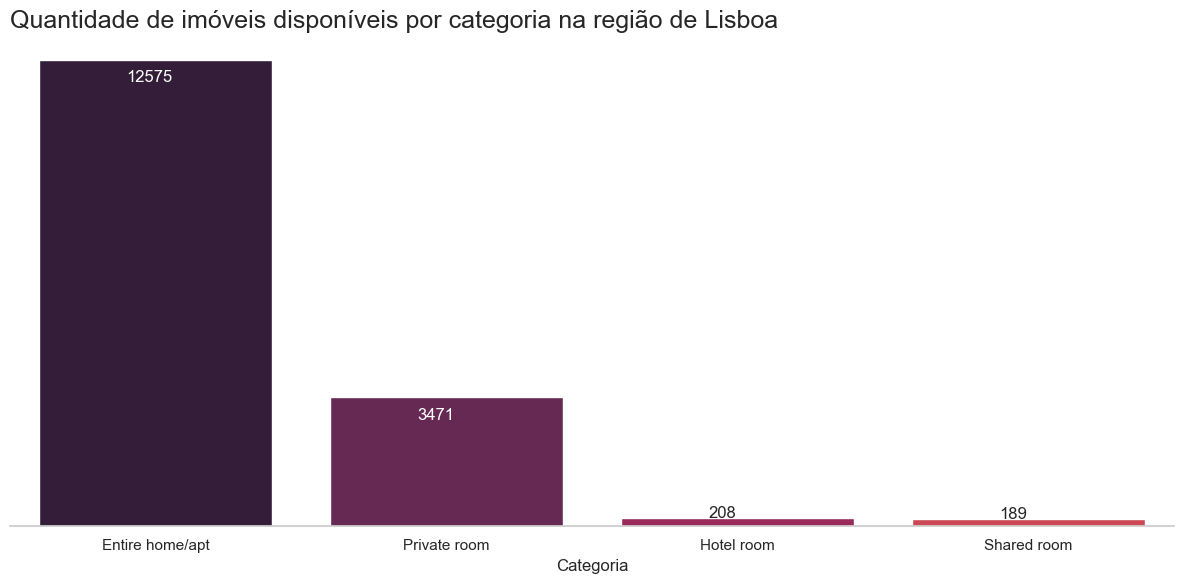

In [ ]:
# Análise para quantidade de locações disponíveis
qt_room = df_clean.room_type.value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=qt_room.index, y=qt_room.values)

ax.set_title('Quantidade de imóveis disponíveis por categoria na região de Lisboa', loc='left', fontsize=18)
ax.set_xlabel('Categoria')
#ax.set_ylabel('Quantidade')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(qt_room.values.shape[0]-2):
  ax.text(i-.1, qt_room.values[i]-600, f'{round(qt_room.values[i], 2)}', fontsize=12, color='white')
for i in range(2, qt_room.values.shape[0]):
  ax.text(i-.1, qt_room.values[i], f'{round(qt_room.values[i], 2)}', fontsize=12)

plt.tight_layout()

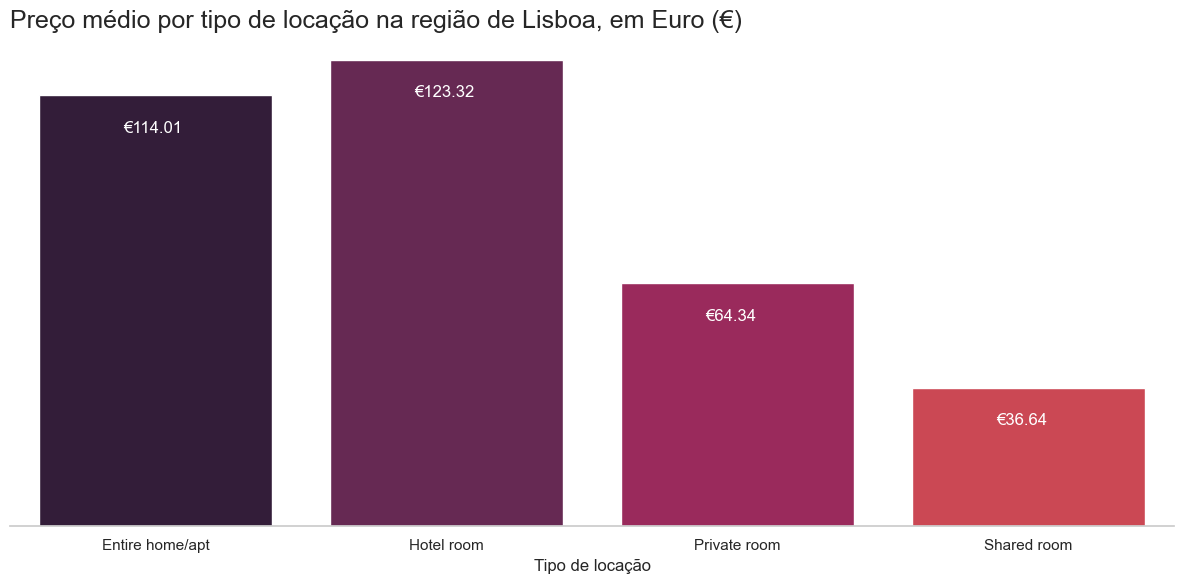

In [ ]:
# Análise do preço médio por tipo de locação
preco_medio = df_clean.groupby('room_type').price.mean()

fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=preco_medio.index, y=preco_medio.values)
ax.set_title('Preço médio por tipo de locação na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('Tipo de locação')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(preco_medio.values.shape[0]):
  ax.text(i-.11, preco_medio.values[i]-10, f'€{round(preco_medio.values[i], 2)}', fontsize=12, color='white')

plt.tight_layout()

Opaaa... temos uma mudança.

Agora o aluguel mais caro é para quartos de hoteis, seguido de casa/apartamento completo, quarto privado e quarto compartilhado. **Faz total sentido!**

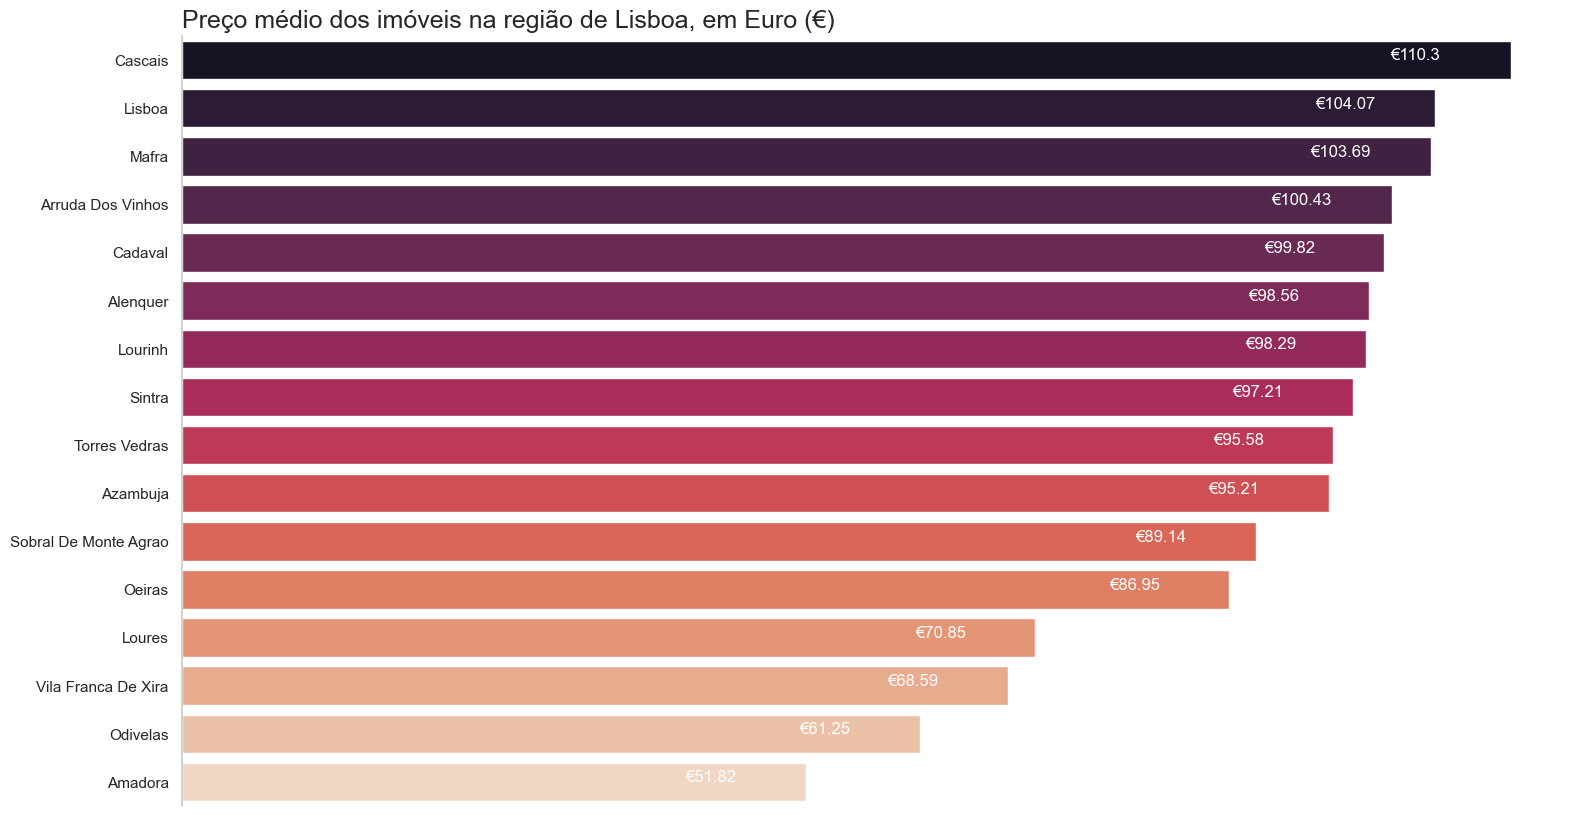

In [ ]:
# Análise ds preço médio por cidade
preco_por_regiao = df_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

fi, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=preco_por_regiao.index, x=preco_por_regiao.values, orient='h', palette='rocket')

ax.set_title('Preço médio dos imóveis na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_ylabel('')
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelbottom = False)
ax.grid(False)

#plt.xticks(rotation=45)
for i in range(preco_por_regiao.values.shape[0]):
  ax.text(preco_por_regiao.values[i]-10, i, f'€{round(preco_por_regiao.values[i], 2)}', fontsize=12, color='white')

plt.show()

Opaaa... mais uma mudança interessante.

Agora os dados estão bem diferentes e parecem fazer sentido.

**A cidade mais cara é Cascais seguida de Lisboa.**

Bem... **Lisboa é a capital de Portugal e a maior cidade de país**. **Cascais é uma cidade turística costeira em Portugal, a oeste de Lisboa**. É conhecida por suas praias de areia e marina movimentada.

Sintra não é uma cidade litorânea, há uma certa lógica em Cascais ser a cidade mais cara e não Sintra.

## Conclusões


A **análise dos dados do Airbnb** foi realiazada para as cidades da **região metropolitana de Lisboa** que é uma das sete regiões de Portugal, constituída por 118 freguesias (bairros), compreendida em 18 municípios.

- O dataset da região metropolitana de Lisboa é bem extenso e possui alguns dados que indicam conter outliers;
- É possível verificar que a maior parte dos imóveis possuem boa taxa de disponibilidade para o próximo ano;
- O dataset possui vários outliers que altera o resultado correto dos dados;
- As correlações entre as variáveis para determinar o preço de locação é bem fraca, no entanto o resultado encontrado após a remoção de outliers faz sentido;
- O dados de preço do aluguel parecem conter outliers, pois a média original é €133.00, com 75% dos dados abaixo de €148.00 e valor máximo de €9999;
- Os dados de quantidade mínima de noites para alugar um imóvel tem grande indícios de estarem com outliers, pois a média original é 4.2 noites com 75% dos dados abaixo de 3 noites. O valor máximo registrado é 1000 noites;
- A região metropolitana de Lisboa é uma região onde a grande maioria de locaçÕes pelo Airbnb é de casa ou apartamentos completos e quartos privados;
- Os alugueis mais baratos são os quartos compartilhados, porém há poucos na região.
- Para ficar em um quarto privado, um turista não irá pagar muito caro e encontrará um local com certa facilidade, pois há muitos quartos disponíveis.
